# Ecology Exercise 

## Part 1: Reading from a dataset

In this worksheet we will be looking at some ecological data and working with it to try to investigate the relationship between red squirrels, grey squirrels, and pine martens. 

Be sure to download the data:"sheet.csv"          

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

s = pd.read_csv("sheet.csv")  

We have called our sheet of data "s". 
The function **head()** can be used to display the first few rows of your data - a useful way to check and make sure it's been set up correctly. <br>
s.head(5) will display the first five rows of data from our sheet. Note how the "s" and the function are separated by a full stop. 

Display the first 6 rows of data.



In [86]:
s.head(6)                   #this just shows us the first few lines to make sure we have the data  

,Site no.,County,pine_marten,red_squirrel,grey_squirrel,Date camera deployed,time camera set up,Date camera taken down,Time camera taken down,urban,people_km2
0,1,Athlone,5,25,51,23-Feb,12:00,02-Mar,14:00,y,270.049900
1,2,Athlone,10,30,40,29-Apr,12:37,07-May,16:35,n,26.532700
2,3,Athlone,12,22,38,15-Feb,13:30,23-Feb,17:40,y,802.968149
3,4,Athlone,8,17,61,08-Mar,13:35,15-Mar,12:10,y,2761.494600
4,5,Athlone,8,16,52,06-Feb,NaN,00/01,NaN,n,12.888200
5,6,Athlone,6,25,43,23-Feb,12:00,02-Mar,14:00,y,270.049900


The function **tail** works similarly, but shows the last few rows of data. <br>
Display the last 3 rows. 

##  Solution 

In [87]:
s.tail(3)

,Site no.,County,pine_marten,red_squirrel,grey_squirrel,Date camera deployed,time camera set up,Date camera taken down,Time camera taken down,urban,people_km2
100,101,Kilkenny,60,91,6,10-Apr,14:45,22-Apr,16:06,y,3007.106764
101,102,Kilkenny,51,60,7,19-Mar,13:30,14-Mar,12:30,y,516.149199
102,103,Kilkenny,59,50,3,12-Feb,NaN,00/01,NaN,n,32.196850


**len()** will output the total length of a speciefied list of numbers. 
**columns** is a *subset* of our data sheet "s" that only contains a list of the names of each row. 

Using both the **len()** function and **columns**, can you find out how many columns of data there are?

##  Solution 

In [4]:
len(s.columns) 

11

Let's try creating a subset of a subset. You can create two seperate subsets (or "conditions") and combine them 
using "&". 

Show which sites counted in Kilkenny had a Pine Marten activity of 50 or more from the data.  
What percentage (to two decimal places) of the overal Pine Marten activity in Kilkenny does this account for?

Hint: You can format <font color='blue'> answer</font> to 2 decimal places by using **{:0.2f}".format(**<font color='blue'> answer</font> **)** as you print it. 
 
## Solution

In [88]:
Kil = (s.County == "Kilkenny") # filter 1
PM50 = (s.pine_marten >= 50)   # fileter 2
KilPM = Kil & PM50             # combine filters
s[KilPM]

,Site no.,County,pine_marten,red_squirrel,grey_squirrel,Date camera deployed,time camera set up,Date camera taken down,Time camera taken down,urban,people_km2
86,87,Kilkenny,51,68,8,not recorded,not recorded,not recorded,not recorded,y,689.260920
88,89,Kilkenny,67,92,2,10-Apr,14:45,22-Apr,16:06,y,3007.106764
90,91,Kilkenny,61,56,2,12-Feb,NaN,00/01,NaN,n,32.196850
92,93,Kilkenny,71,75,5,11-Feb,not recorded,18-Feb,not recorded,n,27.889734
93,94,Kilkenny,66,96,7,10-Apr,14:45,22-Apr,16:06,y,3007.106764
95,96,Kilkenny,66,61,3,12-Feb,NaN,00/01,NaN,n,32.196850
96,97,Kilkenny,71,70,2,03-Mar,15:00,11-Mar,16:15,y,1511.211406
99,100,Kilkenny,60,59,5,11-Feb,not recorded,18-Feb,not recorded,n,27.889734
100,101,Kilkenny,60,91,6,10-Apr,14:45,22-Apr,16:06,y,3007.106764
101,102,Kilkenny,51,60,7,19-Mar,13:30,14-Mar,12:30,y,516.149199


In [13]:
PM_all = (s.pine_marten >= 0)             # all pine marten activity 
KilPM_all = Kil & PM_all                  # combinding filters to just get PM activity from Kilkenny 
ans1 = (len(s[KilPM])/len(s[KilPM_all]))

print("{:0.2f}".format(ans1),"%")

0.61 %


From the data, how many sites counted in Dublin had a Pine Marten activity of 5 or less?  
What percentage of the overal Pine Marten activity in Dublin does this account for?

## Solution

In [15]:
Dub = (s.County == "Dublin")
PM2 = (s.pine_marten <= 5)
DubPM = Dub & PM2
len(s[DubPM])

53

In [16]:
PM_all = (s.pine_marten >= 0)
DubPM_all = Dub & PM_all

ans2 = (len(s[DubPM])/len(s[DubPM_all]))

print("{:0.2f}".format(ans2),"%")

0.82 %


The standard deviation tells us how closely data are gathered around the mean. A low standard deviation indicates data that
are less dispersed away from the average. 

We want to compare the standard deviations of grey squirrel data for each county to 
see if there are any noticable differences. 

First let's find the standard deviation of grey squirrel activity in Athlone:

* Calculate the mean, which will be sum of all your subset values divided by N (the number of values in that subset) 
* Find the variance: $$var = \frac{\sum (x-mean)^2}{N-1}$$ <br>
* Use the **sqrt** function to find the square route of the variance, which gives the standard deviation. 




## Solution

In [53]:
Ath1 = s[(s.County == "Athlone")]
x1 = (Ath1.grey_squirrel)
mean1 = sum(x1) / len(x1)   # mean
var1  = sum(((x-mean1)**2) for x in x1) / (len(x1)-1)  # variance
std1  = math.sqrt(var1)




print("\n","Athlone: ",std1)


 Athlone:  10.189132497550101


Find the standard deviation of the other two counties and display all three values. 

## Solution

In [54]:
Dub1 = s[(s.County == "Dublin")]
x2 = (Dub1.grey_squirrel)
mean2 = sum(x2) / len(x2)   # mean
var2  = sum(((x-mean2)**2) for x in x2) / (len(x2)-1)  # variance
std2  = math.sqrt(var2)

Kil1 = s[(s.County == "Kilkenny")]
x3 = (Kil1.grey_squirrel)
mean3 = sum(x3) / len(x3)   # mean
var3  = sum(((x-mean3)**2) for x in x3) / (len(x3)-1)  # variance
std3  = math.sqrt(var3)

print("\n","Athlone: ",std1,"\n","Dublin:  ",std2,"\n","Kilkenny:",std3,"\n")


 Athlone:  10.189132497550101 
 Dublin:   10.039752716844404 
 Kilkenny: 2.3326329481056884 



Now we want to visualise the data across the test sites. <br>
Plot a stacked histogram with three bars (one for each county). Each bar should contain three coloured regions representing species populations for that county.   <br>


Do you notice anything about the relationsips between the species from the plot?

## Soltution

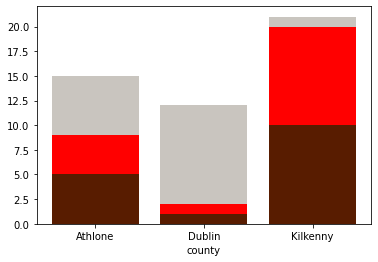

In [56]:
PM = [5, 1,10]
RED = [4, 1,10]
GRY = [6, 10, 1]

position = ("Athlone","Dublin","Kilkenny")


plt.bar(position, PM, color='#581C00')

plt.bar(position, RED, bottom=PM, color='r')

plt.bar(position, GRY, bottom=[PM[j] +RED[j] for j in range(len(PM))], color='#C9C5BF')
 

plt.xlabel("county")
plt.show()


Let's try to get some info from this data. Firstly, display the average activites of each species per county. 

## Solution

In [73]:
Ath = (s.County == "Athlone")
ah = np.mean(s[Ath])

Dub = (s.County == "Dublin")
db = np.mean(s[Dub])

Kil = (s.County == "Kilkenny")
kk = np.mean(s[Kil])

print("\n","Athlone ",ah,"\n","Dublin  ",db,"\n","kilkenny",kk)


 Athlone  Site no.          10.50000
pine_marten        9.10000
red_squirrel      20.05000
grey_squirrel     46.65000
people_km2       774.78671
dtype: float64 
 Dublin   Site no.          53.000000
pine_marten        2.984615
red_squirrel      12.676923
grey_squirrel     80.215385
people_km2       538.830817
dtype: float64 
 kilkenny Site no.          94.500000
pine_marten       55.222222
red_squirrel      67.500000
grey_squirrel      4.166667
people_km2       887.857800
dtype: float64


It has been suggested that Pine Martens will try to avoid humans and urban areas. 

Dublin appears to have the lowest activity of Pine Martens.

Try finding the percentage of sites in Dublin that are urban compared to rural (to two decimal places)

## Solution

In [83]:
Dub = (s.County == "Dublin")
urby = (s.urban == "y")
urbn = (s.urban == "n")
Duburby = Dub & urby
Duburbn = Dub & urbn
perD = len(s[Duburby])/(len(s[Duburby])+len(s[Duburbn]))*100

print("{:0.2f}".format(perD),"%", "of Dublin sites were urban.")

84.62 % of Dublin sites were urban.


Find the percentage of sites in Kilkenny that are urban compared to rural (to three decimal places)

## Solution

In [82]:
Kil = (s.County == "Kilkenny")
urby = (s.urban == "y")
urbn = (s.urban == "n")
Kilurby = Kil & urby
Kilurbn = Kil & urbn
perK = len(s[Kilurby])/(len(s[Kilurby])+len(s[Kilurbn]))*100

print("{:0.3f}".format(perK),"%", "of Kilkenny sites were urban.")

66.667 % of Kilkenny sites were urban.


## Part 2: Modelling Populations

Let's model a population of red squirrels living in Kilkenny! 

Population size at a particular time "t" (in days) depends on the initial population at time 0, the carrying capactiy "k" (how many squirrels can the local area hold), and some constants (including a growth coefficient "r" ). To make a population model more accurate, you can add extra factors, such as the negative effects of predators. 

For now, we will model a simple population in a forest. 

## Solution

In [ ]:
k=5000       # carrying capactiy: how many squirrels can the forest hold
po=500       # initial population at t(0), or time = 0 
A=(k-po)/po  # This is just a constant 
r=0.05       #The growth coefficient 


Great, so now we know all we need to get started!
To begin, define a function that will tell us what the population should be at at a time "t". 

$$P(t) = \frac{k}{(1+A\times e^{-r\times t})}$$


In [ ]:
def p(t) :                  #define the name of the function 
    P = k/(1+A*math.exp(-r*t))
    return P   # input the function 

Why don't we test out our new formula?
Try calculating what the expected population of red squirrels will be 5 days after t=0. 

In [ ]:
p(5)

We can see the population rises fairly quickly after just a few days. What busy squirrels. 
Since we are *developing* our model to be as realistic as possible, it may be helpful to graph it.

Plot the function from day 0 to day 250. 

In [ ]:
def h(b):
    l = []
    for i in b:
        l.append(int(p(i)))
    return l
xa = np.arange(0, 250, 1)
plt.plot(xa, h(xa))
plt.show()

We can certainly see considerable growth as the squirrels approach the carrying capacity "k" of 5000.
Notice how the function plateaus as it reaches its "destination" of 5000. 



In [ ]:
# possible extention of this exercise: add extra variables to drag down population after reaching near k

## Part 3: Predator/Prey Relationships

In real life, squirrel populations may not rise quite as steadily as that due to adverse factors such as disease and predation. 
With this section, we introduce pine martens to the forest, who hunt the squirrels. As the predators are succesfuly eating the squirrels, their population increases, pushing the squirrel population down. However, now there is not enough food for the predators! This makes the predator population fall, and the prey population to bounce back up, creating a cycle. We want to model this relationship. 


Let's get a function to run for a specific amount of time. <br>
The start time will be zero, and we define the end time as a variable: "max_time"<br>
The time-step is also important. We must instruct our function to count in regular intervals, denoted by the variable "dt".<br>
In the box below, we will define five important variables: <br>
* initial time "t" = 0
* end time "max_time" which here will be 20 (the specific unit doesn't affect the program but we will call them days)
* the time-step "dt" which we will make 0.05 (making 20 "measurments" per day)
* initial Pine Marten population, "x" = 1.7 (counted in hundreds) 
* initial squirrel population, "y" = 1.8 (also in hundreds)

## Solution

In [2]:
dt = 0.05
max_time = 20
t = 0
y = 1.8
x = 1.7

Great, so now we have defined the **initial conditions** for our model! 
Below, create three empty lists for time, predators, and prey

In [3]:
tL = []
preyL = []
predL = []

As we run our function across all values of t, these lists will be filled with population numbers for squirrels and pine martens. 

Now we need to make a model. Let's start with a very simple model, running under the condition that t has not exceeded max_time. <br>
It is **essential** to remember that the number of prey affects the number of predators and vice-versa. This is reflected in the differential equations.<br> <br>
Note how new values of $y$ depend on both the current values for $y$ and $x.$ 
<br>
Define the following relationships. 

$$y_{n+1} = y_{n}+(y_{n} - y_{n} x_{n})dt $$ <br>
$$x_{n+1} = x_{n}+(-x_{n} + y_{n} x_{n})dt $$ 
<br> 
where:
* y is the number of prey
* x is the number of predators 
* n is the number of times we've checked the populations.
* dt is the time-step (the amount of time that passes between checks)

Store the values of t, y, and x in your lists and plot both y and xator lists versus your time list. 

In [4]:
while t <= max_time:                      #funtion won't run after time limit

    t = t + dt                            # add increments of 0.05 to each "day" until we reach max_time
    y = y + (y - y*x)*dt   # two functions where x and y are in some way intertwined. 
    x = x + (-x + y*x)*dt

    tL.append(t)       # add to lists
    preyL.append(y)
    predL.append(x)

plt.plot(tL, preyL, 'b', tL, predL, 'g', lw = 2.5, linestyle='solid', ) # plot different colours for clarity 
plt.show()

NameError: name 'plt' is not defined

What relationship between squirrel and pine marten populatons is shown in the plot? 


In [ ]:
#answer

We want to make this model more realistic. The Lotka-Volterra Model is similar to the model used above but includes some additional parameters which will be used to modify the populations. 
We will include these paramaters as constant variables in our differential equations: 
* a = 0.6, this is the birth rate of the prey. 
* b = 0.4, prey death rate
* c = 0.35, predator death rate
* d = 0.21, predator birth rate

$$y_{n+1} = y_{n}+({\color{red} {a}} y_{n} - {\color{red} {b}} y_{n} x_{n})dt $$ <br>
$$x_{n+1} = x_{n}+(-{\color{red} {c}} x_{n} + {\color{red} {d}} x_{n} y_{n})dt $$ 


Bump up your max_time to 40 to get a better visualisation of the relationship

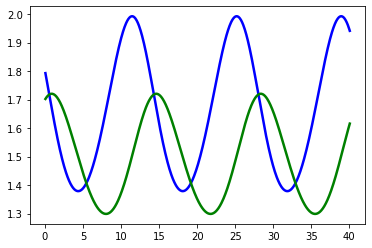

In [84]:
a = 0.6 # define variables. Small adjustments here make a large impact on the model
b = 0.4
c = 0.35
d = 0.21

max_time = 40
dt = 0.05

t = 0
y = 1.8 # initial prey 
x = 1.7 # init pred

tL = []  # refedine empty lists so that previous cell is wiped
preyL = []
predL = []

while t <= max_time:

    t = t + dt
    y = y + (a*y - b*y*x)*dt  #Lotka-Volterra Model 
    x = x + (-c*x + d*y*x)*dt


    tL.append(t)
    preyL.append(y)
    predL.append(x)


plt.plot(tL, preyL, 'b', tL, predL, 'g', lw = 2.5, linestyle='solid', )
plt.show()

Why do you think there is a time lag between when prey numbers drop and when predator numbers drop?

In [ ]:
#answer